In [130]:
#1
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical stock data using yfinance
def fetch_stock_data(ticker, start_date, end_date):
    # Fetch raw data
    data = yf.download(ticker, start=start_date, end=end_date)
    print("Raw Data (First 10 Rows):")
    print(data.head(10))  # Print first 10 rows of raw data

    # Process data
    data['Date'] = data.index
    data = data[['Date', 'Low', 'High', 'Close']]  # Select columns
    data.rename(columns={'Low': 'Min', 'High': 'Max', 'Close': 'Price'}, inplace=True)
    data.reset_index(drop=True, inplace=True)
    print("\nProcessed Data (First 10 Rows):")
    print(data.head(10))  # Print first 10 rows of processed data
    return data

# Example: Fetch data for Apple (AAPL)
stock_data = fetch_stock_data("AAPL", "2023-01-01", "2024-12-24")


[*********************100%***********************]  1 of 1 completed

Raw Data (First 10 Rows):
Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-01-03  123.768456  125.070000  130.899994  124.169998  130.279999   
2023-01-04  125.045029  126.360001  128.660004  125.080002  126.889999   
2023-01-05  123.718971  125.019997  127.769997  124.760002  127.129997   
2023-01-06  128.271088  129.619995  130.289993  124.889999  126.010002   
2023-01-09  128.795578  130.149994  133.410004  129.889999  130.470001   
2023-01-10  129.369553  130.729996  131.259995  128.119995  130.259995   
2023-01-11  132.100845  133.490005  133.509995  130.460007  131.250000   
2023-01-12  132.021683  133.410004  134.259995  131.440002  133.880005   
2023-01-13  133.357635  134.759995  134.919998  131.660004  132.029999   
2023-01-17  134.525345  135.940002  137.289993  134.130005  134.830002   

Price      

In [131]:
# Fetch data for the year 2024
stock_data_2024 = fetch_stock_data("AAPL", "2024-01-01", "2024-12-31")

# Print the entire data for 2024
print("\nEntire 2024 Data:")
print(stock_data_2024)  # Print the whole dataset for the year 2024

[*********************100%***********************]  1 of 1 completed

Raw Data (First 10 Rows):
Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2024-01-02  184.734985  185.639999  188.440002  183.889999  187.149994   
2024-01-03  183.351761  184.250000  185.880005  183.429993  184.220001   
2024-01-04  181.023178  181.910004  183.089996  180.880005  182.149994   
2024-01-05  180.296707  181.179993  182.759995  180.169998  181.990005   
2024-01-08  184.655365  185.559998  185.600006  181.500000  182.089996   
2024-01-09  184.237411  185.139999  185.149994  182.729996  183.919998   
2024-01-10  185.282288  186.190002  186.399994  183.919998  184.350006   
2024-01-11  184.685211  185.589996  187.050003  183.619995  186.539993   
2024-01-12  185.013611  185.919998  186.740005  185.190002  186.059998   
2024-01-16  182.734772  183.630005  184.259995  180.929993  182.160004   

Price      

In [132]:
from sklearn.preprocessing import MinMaxScaler

# Function to normalize the data
def normalize_data(data):
    # Select the columns to normalize
    columns_to_normalize = ['Min', 'Max', 'Price']

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Apply the scaler to the selected columns
    data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

    print("\nNormalized Data (First 10 Rows):")
    print(data.head(10))  # Print the first 10 rows of normalized data

    return data, scaler  # Return both normalized data and scaler

# Normalize the fetched stock data
normalized_stock_data, scaler = normalize_data(stock_data)

# Feature engineering: Normalize data
#scaler = MinMaxScaler()
#scaled_data = scaler.fit_transform(stock_data[['Min', 'Max', 'Price']])



Normalized Data (First 10 Rows):
Price        Date       Min       Max     Price
Ticker                 AAPL      AAPL      AAPL
0      2023-01-03  0.000000  0.024476  0.000384
1      2023-01-04  0.007039  0.006960  0.010288
2      2023-01-05  0.004564  0.000000  0.000000
3      2023-01-06  0.005569  0.019706  0.035317
4      2023-01-09  0.044245  0.044104  0.039386
5      2023-01-10  0.030554  0.027291  0.043839
6      2023-01-11  0.048654  0.044886  0.065029
7      2023-01-12  0.056235  0.050751  0.064415
8      2023-01-13  0.057936  0.055912  0.074779
9      2023-01-17  0.077042  0.074445  0.083839


In [133]:
import torch
from torch.utils.data import Dataset, DataLoader

# Custom Dataset for Stock Data
class StockDataset(Dataset):
    def __init__(self, data, seq_length=5):
        """
        Args:
            data (numpy array): The scaled data to create sequences from.
            seq_length (int): Number of past days to consider for prediction.
        """
        self.data = data
        self.seq_length = seq_length

    def __len__(self):
        # Length is reduced by seq_length to ensure valid sequences
        return len(self.data) - self.seq_length

    def __getitem__(self, index):
        """
        Returns:
            x (torch.Tensor): Sequence of `seq_length` data points.
            y (torch.Tensor): The next day's 'Price' to predict.
        """
        x = self.data[index:index + self.seq_length, :]  # Sequence of features
        y = self.data[index + self.seq_length, 2]  # Predict 'Price' (column index 2)
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Sequence length for input
seq_length = 5

# Convert normalized stock data to numpy for dataset creation
scaled_data = normalized_stock_data[['Min', 'Max', 'Price']].values

# Create the dataset
dataset = StockDataset(scaled_data, seq_length=seq_length)

# Split into training and testing datasets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create DataLoaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Total samples: {len(dataset)}")
print(f"Training samples: {len(train_dataset)}")
print(f"Testing samples: {len(test_dataset)}")


Total samples: 492
Training samples: 393
Testing samples: 99


In [134]:
#5

import torch
import torch.nn as nn

# Define Transformer model
class StockTransformer(nn.Module):
    def __init__(self, input_dim, embed_dim, num_heads, num_layers, seq_length, dropout=0.1):
        """
        Args:
            input_dim (int): The number of input features (e.g., 'Min', 'Max', 'Price').
            embed_dim (int): The dimensionality of the embedding space.
            num_heads (int): The number of attention heads in each transformer layer.
            num_layers (int): The number of transformer encoder layers.
            seq_length (int): The length of the input sequence.
            dropout (float): Dropout rate.
        """
        super(StockTransformer, self).__init__()

        # Input embedding layer
        self.embedding = nn.Linear(input_dim, embed_dim)

        # Positional encoding (learnable parameter)
        self.positional_encoding = nn.Parameter(torch.zeros(1, seq_length, embed_dim))

        # Transformer Encoder Layer
        self.encoder_layer = nn.TransformerEncoderLayer(embed_dim, num_heads, dropout=dropout)
        self.encoder = nn.TransformerEncoder(self.encoder_layer, num_layers)

        # Decoder to predict output (single value)
        self.decoder = nn.Linear(embed_dim, 1)

    def forward(self, x):
        # Apply embedding and positional encoding
        x = self.embedding(x) + self.positional_encoding

        # Pass through the transformer encoder layers
        x = self.encoder(x)

        # Use the output from the last time step to make the prediction
        x = self.decoder(x[:, -1, :])  # Use the last time step's output
        return x

# Model configuration
input_dim = 3  # 'Min', 'Max', 'Price'
embed_dim = 64  # Embedding dimension
num_heads = 4  # Number of attention heads
num_layers = 2  # Number of transformer encoder layers
seq_length = 5  # Length of the input sequence
model = StockTransformer(input_dim, embed_dim, num_heads, num_layers, seq_length)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0002)

# Print model summary (Optional, if you want to verify the model architecture)
print(model)


StockTransformer(
  (embedding): Linear(in_features=3, out_features=64, bias=True)
  (encoder_layer): TransformerEncoderLayer(
    (self_attn): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
    )
    (linear1): Linear(in_features=64, out_features=2048, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (linear2): Linear(in_features=2048, out_features=64, bias=True)
    (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (dropout1): Dropout(p=0.1, inplace=False)
    (dropout2): Dropout(p=0.1, inplace=False)
  )
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=2048, bias=True)
     

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [135]:
#6

# Training loop with early stopping
num_epochs = 50
patience = 5  # Number of epochs with no improvement before stopping
best_val_loss = float('inf')  # Initialize the best validation loss as infinity
epochs_without_improvement = 0  # Counter for the number of epochs with no improvement

model.train()
for epoch in range(num_epochs):
    train_loss = 0
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = criterion(y_pred.squeeze(), y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Calculate the average training loss
    avg_train_loss = train_loss / len(train_loader)

    # Validation loss
    model.eval()  # Switch to evaluation mode for validation
    val_loss = 0
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            y_pred = model(x_batch)
            loss = criterion(y_pred.squeeze(), y_batch)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(test_loader)

    # Print losses for the current epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

    # Early stopping condition
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_without_improvement = 0  # Reset the counter if the validation loss improves
    else:
        epochs_without_improvement += 1

    # If no improvement in validation loss for 'patience' epochs, stop training
    if epochs_without_improvement >= patience:
        print(f"Early stopping triggered. Training stopped at epoch {epoch + 1}.")
        break


Epoch 1/50, Train Loss: 0.0908, Validation Loss: 0.0084
Epoch 2/50, Train Loss: 0.0121, Validation Loss: 0.0056
Epoch 3/50, Train Loss: 0.0038, Validation Loss: 0.0024
Epoch 4/50, Train Loss: 0.0014, Validation Loss: 0.0016
Epoch 5/50, Train Loss: 0.0009, Validation Loss: 0.0006
Epoch 6/50, Train Loss: 0.0007, Validation Loss: 0.0005
Epoch 7/50, Train Loss: 0.0005, Validation Loss: 0.0004
Epoch 8/50, Train Loss: 0.0005, Validation Loss: 0.0006
Epoch 9/50, Train Loss: 0.0006, Validation Loss: 0.0004
Epoch 10/50, Train Loss: 0.0005, Validation Loss: 0.0004
Epoch 11/50, Train Loss: 0.0006, Validation Loss: 0.0004
Epoch 12/50, Train Loss: 0.0005, Validation Loss: 0.0004
Epoch 13/50, Train Loss: 0.0005, Validation Loss: 0.0004
Epoch 14/50, Train Loss: 0.0005, Validation Loss: 0.0004
Epoch 15/50, Train Loss: 0.0005, Validation Loss: 0.0004
Epoch 16/50, Train Loss: 0.0005, Validation Loss: 0.0005
Epoch 17/50, Train Loss: 0.0006, Validation Loss: 0.0003
Epoch 18/50, Train Loss: 0.0006, Validat

In [146]:
# Evaluation
model.eval()  # Set the model to evaluation mode
predictions = []
actuals = []

# Ensure no gradients are calculated during evaluation
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        y_pred = model(x_batch).squeeze(-1).cpu().numpy()  # 1D array for predictions
        predictions.extend(y_pred)
        actuals.extend(y_batch.cpu().numpy())  # 1D array for actuals

# Prepare arrays for rescaling
predictions_array = np.zeros((len(predictions), 3))
actuals_array = np.zeros((len(actuals), 3))
predictions_array[:, 2] = predictions
actuals_array[:, 2] = actuals

# Rescale predictions and actuals
predictions_rescaled = scaler.inverse_transform(predictions_array)[:, 2]
actuals_rescaled = scaler.inverse_transform(actuals_array)[:, 2]

# Debug outputs
print("Scaler min values:", scaler.data_min_)
print("Scaler max values:", scaler.data_max_)
print(f"Normalized Predictions (First 5): {predictions[:5]}")
print(f"Rescaled Predictions (First 5): {predictions_rescaled[:5]}")
print(f"Normalized Actuals (First 5): {actuals[:5]}")
print(f"Rescaled Actuals (First 5): {actuals_rescaled[:5]}")


Scaler min values: [124.16999817 127.76999664 125.01999664]
Scaler max values: [253.44999695 255.6499939  255.27000427]
Normalized Predictions (First 5): [0.49560094, 0.5534367, 0.77564085, 0.3421657, 0.5151454]
Rescaled Predictions (First 5): [189.5720227  197.10513059 226.04722266 169.58708279 192.11769166]
Normalized Actuals (First 5): [0.45589247, 0.5228406, 0.71800375, 0.3426487, 0.4838387]
Rescaled Actuals (First 5): [184.39999479 193.11999127 218.53999054 169.64999436 188.03999195]


In [147]:
# Save actual vs predicted data to CSV for Power BI visualization
prediction_dates = stock_data['Date'][-len(predictions):].values

output_data = pd.DataFrame({
    'Date': prediction_dates,
    'Actual Price': actuals_rescaled,  # Use the rescaled actual values
    'Predicted Price': predictions_rescaled  # Use the rescaled predicted values
})

# Save to CSV
output_data.to_csv('predicted_vs_actual.csv', index=False)
print("Data saved to 'predicted_vs_actual.csv'")

Data saved to 'predicted_vs_actual.csv'


In [124]:
# Save future predictions (with rescaled prices)
def predict_future_prices(model, initial_sequence, scaler, num_days, seq_length):
    model.eval()
    future_predictions = []
    input_sequence = initial_sequence.copy()

    with torch.no_grad():
        for _ in range(num_days):
            x_input = torch.tensor(input_sequence[-seq_length:], dtype=torch.float32).unsqueeze(0)
            y_pred = model(x_input).item()
            future_predictions.append(y_pred)
            input_sequence.append([0, 0, y_pred])

    # Reshape predictions for inverse transform
    future_predictions_array = np.array([[0, 0, p] for p in future_predictions])

    # Rescale predictions back to original scale
    future_predictions_rescaled = scaler.inverse_transform(future_predictions_array)[:, 2]
    return future_predictions_rescaled

# Future predictions
initial_sequence = scaled_data[-seq_length:].tolist()
num_days = 7  # Predict for a week
future_predictions = predict_future_prices(model, initial_sequence, scaler, num_days, seq_length)

# Generate dates for future predictions
last_date = "2024-12-25"
future_dates = pd.date_range(start=last_date, periods=num_days + 1, freq='B')[1:]

# Save future predictions to CSV
future_output_data = pd.DataFrame({
    'Date': future_dates,
    'Predicted Price': future_predictions
})

# Save to CSV
future_output_data.to_csv('future_predictions.csv', index=False)
print("Future predictions saved to 'future_predictions.csv'")


Future predictions saved to 'future_predictions.csv'


RAE (Relative Absolute Error): 0.1040
MSE (Mean Squared Error): 9.6081
MAPE (Mean Absolute Percentage Error): 1.1459


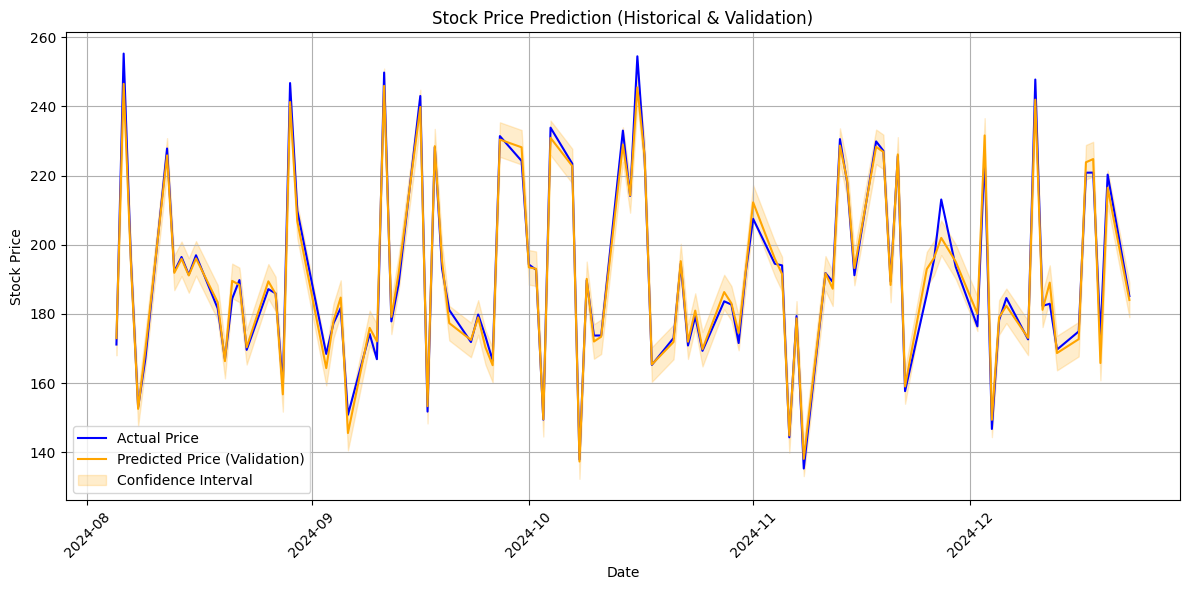

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate RAE, MSE, and MAPE
def calculate_metrics(actuals, predictions):
    # Ensure they are numpy arrays for element-wise operations
    actuals_np = np.array(actuals)
    predictions_np = np.array(predictions)

    # Mean of actuals for RAE calculation
    mean_actual = np.mean(actuals_np)

    # Calculate RAE
    rae = np.sum(np.abs(actuals_np - predictions_np)) / np.sum(np.abs(actuals_np - mean_actual))

    # Calculate MSE
    mse = np.mean((actuals_np - predictions_np) ** 2)

    # Calculate MAPE
    mape = np.mean(np.abs((actuals_np - predictions_np) / actuals_np)) * 100

    return rae, mse, mape

# Calculate the metrics
rae, mse, mape = calculate_metrics(actuals_rescaled, predictions_rescaled)

# Print out the evaluation metrics
print(f"RAE (Relative Absolute Error): {rae:.4f}")
print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.4f}")

# Visualization: Stock Price Predictions
plt.figure(figsize=(12, 6))
plt.plot(prediction_dates, actuals_rescaled, label="Actual Price", color='blue')
plt.plot(prediction_dates, predictions_rescaled, label="Predicted Price (Validation)", color='orange')

# Confidence Interval (use predictions_rescaled for element-wise operations)
plt.fill_between(prediction_dates, predictions_rescaled - 5, predictions_rescaled + 5, color='orange', alpha=0.2, label="Confidence Interval")

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction (Historical & Validation)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
